In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle
!mv /content/kaggle.json ~/.kaggle/

mv: cannot stat '/content/kaggle.json': No such file or directory


In [3]:
# change the permisions of the file
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
 # test it out
 !kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [5]:
%mkdir dataset
%mkdir dataset/images # for source images
%mkdir dataset/masks # for annotation masks
%mkdir dataset/test # for test images
%mkdir dataset/temp # temp storage

In [6]:
#move the zip file to my google drive
#first mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#get the zip file from the drive, download
!cp /content/drive/MyDrive/chexmasks.zip /content/dataset.zip

In [8]:
!unzip dataset.zip -d dataset/temp/

Archive:  dataset.zip
  inflating: dataset/temp/Lung Segmentation/.ipynb_checkpoints/Montgomery-checkpoint.ipynb  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0001_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0002_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0003_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0004_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0005_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0006_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0007_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0008_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0009_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0010_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0011_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0012_0.png  
  inflating: dataset/

In [ ]:
# start the download
!kaggle datasets download 'nikhilpandey360/chest-xray-masks-and-labels'

Dataset URL: https://www.kaggle.com/datasets/nikhilpandey360/chest-xray-masks-and-labels
License(s): CC0-1.0
100% 9.58G/9.58G [06:05<00:00, 23.8MB/s]
100% 9.58G/9.58G [06:05<00:00, 28.1MB/s]


In [ ]:
!unzip chest-xray-masks-and-labels.zip -d dataset/temp/

Archive:  chest-xray-masks-and-labels.zip
  inflating: dataset/temp/Lung Segmentation/.ipynb_checkpoints/Montgomery-checkpoint.ipynb  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0001_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0002_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0003_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0004_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0005_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0006_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0007_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0008_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0009_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0010_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0011_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0012_0.png  
 

In [9]:
%ls dataset/temp/Lung\ Segmentation

ClinicalReadings/  masks/                       NLM-MontgomeryCXRSet-ReadMe.pdf
CXR_png/           NLM-ChinaCXRSet-ReadMe.docx  test/


In [10]:
%mv dataset/temp/Lung\ Segmentation/CXR_png/* dataset/images/
IMAGE_PATH = "/content/dataset/images/"

In [11]:
%mv dataset/temp/Lung\ Segmentation/masks/* dataset/masks/
MASK_PATH = '/content/dataset/masks/'

In [12]:
%mv dataset/temp/Lung\ Segmentation/test/* dataset/test/
TEST_PATH = '/content/dataset/test/'

In [13]:
# remove the original zip file
%rm chest-xray-masks-and-labels.zip

rm: cannot remove 'chest-xray-masks-and-labels.zip': No such file or directory


In [14]:
# clean-up
%rm -r dataset/temp/

In [15]:
#HARMONIZE THE DATASET

In [16]:
# importing os module
import os

# suffix cropping function
def rchop(s, suffix):
    if suffix and s.endswith(suffix):
        return s[:-len(suffix)]
    return s

suffix = "_mask.png"

# iterate over all mask images and edit the file-names
for count, filename in enumerate(os.listdir("/content/dataset/masks")):
  src = "/content/dataset/masks/" + filename
  res = rchop(src, suffix)
  dst = ""
  if src != res:
    dst = rchop(src, suffix) + ".png"
    os.rename(src, dst)

In [17]:
# check the number of files in the images/ and masks/ directories
import os.path

print("number of files in images/ directory: " + str(len([name for name in os.listdir("/content/dataset/images/")])))
print("number of files in masks/ directory: " + str(len([name for name in os.listdir("/content/dataset/masks/")])))


number of files in images/ directory: 800
number of files in masks/ directory: 704


In [18]:
# function to confirm the existence of a file in a given directory
def searchFile(fileName, TARGET_PATH):
  for root, dirs, files in os.walk(TARGET_PATH):
    for Files in files:
      #print(Files)
      found = Files.find(fileName)
      if found != -1:
        break
  return found

In [19]:
%mkdir /content/dataset/orphan_images

In [20]:
# clean up the images/ directory by removing all images that do not have a mask
import shutil

cnt = 0

for count, filename in enumerate(os.listdir("/content/dataset/images")):
  found = searchFile(filename, MASK_PATH)
  if found == -1:
    cnt = cnt + 1
    src = "/content/dataset/images/" + filename
    dst = "/content/dataset/orphan_images/" + filename
    dest = shutil.move(src, dst)
print("number of files not matched: " + str(cnt))

number of files not matched: 96


In [21]:
# confirm consistency
print("number of files in images/ directory: " + str(len([name for name in os.listdir("/content/dataset/images/")])))
print("number of files in masks/ directory: " + str(len([name for name in os.listdir("/content/dataset/masks/")])))

number of files in images/ directory: 704
number of files in masks/ directory: 704


In [22]:
import os
import shutil
import random

# Assuming the previous code has already been executed, and the following directories are set up:
IMAGE_PATH = '/content/dataset/images/'
MASK_PATH = '/content/dataset/masks/'
TEST_PATH = '/content/dataset/test/'

# Create the test directory if it doesn't exist
os.makedirs(TEST_PATH, exist_ok=True)

# Get all image filenames
all_images = sorted([f for f in os.listdir(IMAGE_PATH) if f.endswith('.png')])

# Calculate 10% for the test split
num_test = int(len(all_images) * 0.1)

# Randomly select 10% of the dataset for testing
test_indices = random.sample(range(len(all_images)), num_test)

# Move selected images to the test directory
for idx in test_indices:
    src = os.path.join(IMAGE_PATH, all_images[idx])
    dst = os.path.join(TEST_PATH, all_images[idx])
    shutil.move(src, dst)

print(f"Moved {num_test} images to the test directory: {TEST_PATH}")

# Check the number of files in the test directory
print("Number of files in the test directory: " + str(len(os.listdir(TEST_PATH))))

Moved 70 images to the test directory: /content/dataset/test/
Number of files in the test directory: 166


In [23]:
# Create the test_masks directory if it doesn't exist
TEST_MASKS_PATH = '/content/dataset/test_masks/'
os.makedirs(TEST_MASKS_PATH, exist_ok=True)

# Move corresponding masks to the test_masks directory
for idx in test_indices:
    # Get the filename of the image that was moved
    image_filename = all_images[idx]

    # The mask filename is the same as the image filename
    mask_filename = image_filename  # No changes needed to the filename
    src_mask = os.path.join(MASK_PATH, mask_filename)

    # Print debug information
    print(f"Checking for mask: {mask_filename}")
    print(f"Source mask path: {src_mask}")

    # Check if the corresponding mask exists before moving
    if os.path.exists(src_mask):
        dst_mask = os.path.join(TEST_MASKS_PATH, mask_filename)
        shutil.move(src_mask, dst_mask)
    else:
        print(f"Mask not found for image: {image_filename}")

# Check the number of files in the test_masks directory
print("Number of masks in the test_masks directory: " + str(len(os.listdir(TEST_MASKS_PATH))))

Checking for mask: CHNCXR_0024_0.png
Source mask path: /content/dataset/masks/CHNCXR_0024_0.png
Checking for mask: CHNCXR_0603_1.png
Source mask path: /content/dataset/masks/CHNCXR_0603_1.png
Checking for mask: MCUCXR_0021_0.png
Source mask path: /content/dataset/masks/MCUCXR_0021_0.png
Checking for mask: CHNCXR_0317_0.png
Source mask path: /content/dataset/masks/CHNCXR_0317_0.png
Checking for mask: CHNCXR_0145_0.png
Source mask path: /content/dataset/masks/CHNCXR_0145_0.png
Checking for mask: CHNCXR_0162_0.png
Source mask path: /content/dataset/masks/CHNCXR_0162_0.png
Checking for mask: CHNCXR_0177_0.png
Source mask path: /content/dataset/masks/CHNCXR_0177_0.png
Checking for mask: CHNCXR_0285_0.png
Source mask path: /content/dataset/masks/CHNCXR_0285_0.png
Checking for mask: CHNCXR_0524_1.png
Source mask path: /content/dataset/masks/CHNCXR_0524_1.png
Checking for mask: MCUCXR_0092_0.png
Source mask path: /content/dataset/masks/MCUCXR_0092_0.png
Checking for mask: CHNCXR_0033_0.png
Sou

In [24]:
import os
from glob import glob

# Define paths
TEST_IMAGE_PATH = "/content/dataset/test"
TEST_MASK_PATH = "/content/dataset/test_masks"

# Get lists of all images and masks
test_images = sorted(glob(os.path.join(TEST_IMAGE_PATH, "*.png")))
test_masks = sorted(glob(os.path.join(TEST_MASK_PATH, "*.png")))

# Create a set of mask filenames (without directory paths)
mask_filenames = {os.path.basename(mask) for mask in test_masks}

# Iterate through test images and delete those without a corresponding mask
for img_path in test_images:
    img_filename = os.path.basename(img_path)
    if img_filename not in mask_filenames:
        print(f"Deleting orphan image: {img_path}")
        os.remove(img_path)

# After deletion, you can check the counts again
remaining_test_images = sorted(glob(os.path.join(TEST_IMAGE_PATH, "*.png")))
remaining_test_masks = sorted(glob(os.path.join(TEST_MASK_PATH, "*.png")))

print(f"Remaining Test Images: {len(remaining_test_images)}")
print(f"Remaining Test Masks: {len(remaining_test_masks)}")

Deleting orphan image: /content/dataset/test/CHNCXR_0025_0.png
Deleting orphan image: /content/dataset/test/CHNCXR_0036_0.png
Deleting orphan image: /content/dataset/test/CHNCXR_0037_0.png
Deleting orphan image: /content/dataset/test/CHNCXR_0038_0.png
Deleting orphan image: /content/dataset/test/CHNCXR_0039_0.png
Deleting orphan image: /content/dataset/test/CHNCXR_0040_0.png
Deleting orphan image: /content/dataset/test/CHNCXR_0065_0.png
Deleting orphan image: /content/dataset/test/CHNCXR_0181_0.png
Deleting orphan image: /content/dataset/test/CHNCXR_0182_0.png
Deleting orphan image: /content/dataset/test/CHNCXR_0183_0.png
Deleting orphan image: /content/dataset/test/CHNCXR_0184_0.png
Deleting orphan image: /content/dataset/test/CHNCXR_0185_0.png
Deleting orphan image: /content/dataset/test/CHNCXR_0186_0.png
Deleting orphan image: /content/dataset/test/CHNCXR_0187_0.png
Deleting orphan image: /content/dataset/test/CHNCXR_0188_0.png
Deleting orphan image: /content/dataset/test/CHNCXR_018

In [ ]:
import os
import shutil

# Define paths
TEST_PATH = "/content/dataset/test"
TEST_MASKS_PATH = "/content/dataset/test_masks"
TRAIN_PATH = IMAGE_PATH
TRAIN_MASKS_PATH = MASK_PATH

# Move all images from test directory back to train directory
for file_name in os.listdir(TEST_PATH):
    src = os.path.join(TEST_PATH, file_name)
    dst = os.path.join(TRAIN_PATH, file_name)
    if os.path.isfile(src):
        shutil.move(src, dst)

# Move all mask images from test_masks directory back to train_masks directory
for file_name in os.listdir(TEST_MASKS_PATH):
    src = os.path.join(TEST_MASKS_PATH, file_name)
    dst = os.path.join(TRAIN_MASKS_PATH, file_name)
    if os.path.isfile(src):
        shutil.move(src, dst)

print("All files moved back to train and train_masks paths.")

All files moved back to train and train_masks paths.


In [25]:
print("Number of files in the mask directory: " + str(len(os.listdir(MASK_PATH))))
print("Number of files in the train_image directory: " + str(len(os.listdir(IMAGE_PATH))))

Number of files in the mask directory: 634
Number of files in the train_image directory: 634


special code to extract image names from text

In [ ]:
import re

# Sample text from your notepad (replace this with actual content from the notepad)
log_text = """
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Processed CHNCXR_0008_0.png: IoU = 0.9339, Dice = 0.9658
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Processed CHNCXR_0018_0.png: IoU = 0.9278, Dice = 0.9626
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processed CHNCXR_0020_0.png: IoU = 0.8164, Dice = 0.8989
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processed CHNCXR_0025_0.png: IoU = 0.4566, Dice = 0.6269
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0036_0.png: IoU = 0.5294, Dice = 0.6923
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0037_0.png: IoU = 0.6243, Dice = 0.7687
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Processed CHNCXR_0038_0.png: IoU = 0.5323, Dice = 0.6947
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0039_0.png: IoU = 0.5418, Dice = 0.7028
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0040_0.png: IoU = 0.3659, Dice = 0.5357
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0043_0.png: IoU = 0.4512, Dice = 0.6218
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0056_0.png: IoU = 0.5525, Dice = 0.7118
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0065_0.png: IoU = 0.4028, Dice = 0.5743
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processed CHNCXR_0073_0.png: IoU = 0.6187, Dice = 0.7644
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Processed CHNCXR_0082_0.png: IoU = 0.5060, Dice = 0.6720
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Processed CHNCXR_0091_0.png: IoU = 0.7310, Dice = 0.8446
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Processed CHNCXR_0097_0.png: IoU = 0.4664, Dice = 0.6361
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Processed CHNCXR_0100_0.png: IoU = 0.5043, Dice = 0.6705
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Processed CHNCXR_0111_0.png: IoU = 0.5603, Dice = 0.7182
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Processed CHNCXR_0119_0.png: IoU = 0.6532, Dice = 0.7902
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Processed CHNCXR_0130_0.png: IoU = 0.5901, Dice = 0.7422
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Processed CHNCXR_0139_0.png: IoU = 0.7257, Dice = 0.8410
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Processed CHNCXR_0150_0.png: IoU = 0.8164, Dice = 0.8989
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Processed CHNCXR_0159_0.png: IoU = 0.6499, Dice = 0.7878
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0181_0.png: IoU = 0.4522, Dice = 0.6227
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0182_0.png: IoU = 0.6005, Dice = 0.7504
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0183_0.png: IoU = 0.5591, Dice = 0.7172
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processed CHNCXR_0184_0.png: IoU = 0.5088, Dice = 0.6744
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0185_0.png: IoU = 0.4597, Dice = 0.6298
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0186_0.png: IoU = 0.3511, Dice = 0.5197
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processed CHNCXR_0187_0.png: IoU = 0.5727, Dice = 0.7283
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Processed CHNCXR_0188_0.png: IoU = 0.5989, Dice = 0.7491
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processed CHNCXR_0189_0.png: IoU = 0.7634, Dice = 0.8658
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processed CHNCXR_0190_0.png: IoU = 0.5066, Dice = 0.6725
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processed CHNCXR_0191_0.png: IoU = 0.6429, Dice = 0.7826
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0192_0.png: IoU = 0.5338, Dice = 0.6960
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0193_0.png: IoU = 0.6133, Dice = 0.7603
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0194_0.png: IoU = 0.5488, Dice = 0.7087
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0195_0.png: IoU = 0.7131, Dice = 0.8325
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0196_0.png: IoU = 0.6251, Dice = 0.7693
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processed CHNCXR_0197_0.png: IoU = 0.3596, Dice = 0.5290
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processed CHNCXR_0198_0.png: IoU = 0.5382, Dice = 0.6998
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0199_0.png: IoU = 0.7046, Dice = 0.8267
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Processed CHNCXR_0200_0.png: IoU = 0.5801, Dice = 0.7342
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processed CHNCXR_0201_0.png: IoU = 0.3733, Dice = 0.5436
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0202_0.png: IoU = 0.4326, Dice = 0.6040
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0203_0.png: IoU = 0.5567, Dice = 0.7152
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0204_0.png: IoU = 0.7151, Dice = 0.8339
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0205_0.png: IoU = 0.3455, Dice = 0.5136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Processed CHNCXR_0206_0.png: IoU = 0.4536, Dice = 0.6241
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0207_0.png: IoU = 0.5995, Dice = 0.7496
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0208_0.png: IoU = 0.6637, Dice = 0.7978
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0209_0.png: IoU = 0.4693, Dice = 0.6388
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Processed CHNCXR_0210_0.png: IoU = 0.3602, Dice = 0.5296
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Processed CHNCXR_0211_0.png: IoU = 0.4656, Dice = 0.6354
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Processed CHNCXR_0212_0.png: IoU = 0.6884, Dice = 0.8154
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Processed CHNCXR_0213_0.png: IoU = 0.6681, Dice = 0.8010
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Processed CHNCXR_0214_0.png: IoU = 0.6532, Dice = 0.7902
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Processed CHNCXR_0215_0.png: IoU = 0.5036, Dice = 0.6698
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Processed CHNCXR_0216_0.png: IoU = 0.4287, Dice = 0.6001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Processed CHNCXR_0217_0.png: IoU = 0.6079, Dice = 0.7561
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0218_0.png: IoU = 0.3442, Dice = 0.5122
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processed CHNCXR_0219_0.png: IoU = 0.4740, Dice = 0.6432
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0220_0.png: IoU = 0.6938, Dice = 0.8193
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0226_0.png: IoU = 0.4135, Dice = 0.5851
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processed CHNCXR_0254_0.png: IoU = 0.5750, Dice = 0.7302
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0256_0.png: IoU = 0.5270, Dice = 0.6903
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0258_0.png: IoU = 0.3797, Dice = 0.5504
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processed CHNCXR_0259_0.png: IoU = 0.4394, Dice = 0.6106
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0273_0.png: IoU = 0.7008, Dice = 0.8241
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processed CHNCXR_0275_0.png: IoU = 0.2248, Dice = 0.3671
"""

# Extracting image names using regex
pattern = r"Processed (\S+\.png):"
image_names = re.findall(pattern, log_text)

In [ ]:
# Print the extracted image names
for name in image_names:
    print(name)

CHNCXR_0008_0.png
CHNCXR_0018_0.png
CHNCXR_0020_0.png
CHNCXR_0025_0.png
CHNCXR_0036_0.png
CHNCXR_0037_0.png
CHNCXR_0038_0.png
CHNCXR_0039_0.png
CHNCXR_0040_0.png
CHNCXR_0043_0.png
CHNCXR_0056_0.png
CHNCXR_0065_0.png
CHNCXR_0073_0.png
CHNCXR_0082_0.png
CHNCXR_0091_0.png
CHNCXR_0097_0.png
CHNCXR_0100_0.png
CHNCXR_0111_0.png
CHNCXR_0119_0.png
CHNCXR_0130_0.png
CHNCXR_0139_0.png
CHNCXR_0150_0.png
CHNCXR_0159_0.png
CHNCXR_0181_0.png
CHNCXR_0182_0.png
CHNCXR_0183_0.png
CHNCXR_0184_0.png
CHNCXR_0185_0.png
CHNCXR_0186_0.png
CHNCXR_0187_0.png
CHNCXR_0188_0.png
CHNCXR_0189_0.png
CHNCXR_0190_0.png
CHNCXR_0191_0.png
CHNCXR_0192_0.png
CHNCXR_0193_0.png
CHNCXR_0194_0.png
CHNCXR_0195_0.png
CHNCXR_0196_0.png
CHNCXR_0197_0.png
CHNCXR_0198_0.png
CHNCXR_0199_0.png
CHNCXR_0200_0.png
CHNCXR_0201_0.png
CHNCXR_0202_0.png
CHNCXR_0203_0.png
CHNCXR_0204_0.png
CHNCXR_0205_0.png
CHNCXR_0206_0.png
CHNCXR_0207_0.png
CHNCXR_0208_0.png
CHNCXR_0209_0.png
CHNCXR_0210_0.png
CHNCXR_0211_0.png
CHNCXR_0212_0.png
CHNCXR_021

In [ ]:
import os
import shutil

# List of image names you extracted
#image_names = ['CHNCXR_0256_0.png', 'CHNCXR_0258_0.png', 'CHNCXR_0259_0.png', 'CHNCXR_0273_0.png', 'CHNCXR_0275_0.png']

# Keep track of moved and missing images
moved_images = []
missing_images = []

# Move images from train to test
for image_name in image_names:
    # Move the image
    src_image = os.path.join(TRAIN_PATH, image_name)
    dst_image = os.path.join(TEST_PATH, image_name)

    if os.path.isfile(src_image):
        shutil.move(src_image, dst_image)
        moved_images.append(image_name)
    else:
        missing_images.append(image_name)

    # Move the corresponding mask (assuming mask has the same name)
    mask_name = image_name  # Adjust if the mask name pattern differs
    src_mask = os.path.join(TRAIN_MASKS_PATH, mask_name)
    dst_mask = os.path.join(TEST_MASKS_PATH, mask_name)

    if os.path.isfile(src_mask):
        shutil.move(src_mask, dst_mask)
    else:
        missing_images.append(mask_name)

# Report results
print(f"Moved {len(moved_images)} images:")
print(moved_images)
print("\nMissing images or masks:")
print(missing_images)

Moved 23 images:
['CHNCXR_0008_0.png', 'CHNCXR_0018_0.png', 'CHNCXR_0020_0.png', 'CHNCXR_0043_0.png', 'CHNCXR_0056_0.png', 'CHNCXR_0073_0.png', 'CHNCXR_0082_0.png', 'CHNCXR_0091_0.png', 'CHNCXR_0097_0.png', 'CHNCXR_0100_0.png', 'CHNCXR_0111_0.png', 'CHNCXR_0119_0.png', 'CHNCXR_0130_0.png', 'CHNCXR_0139_0.png', 'CHNCXR_0150_0.png', 'CHNCXR_0159_0.png', 'CHNCXR_0226_0.png', 'CHNCXR_0254_0.png', 'CHNCXR_0256_0.png', 'CHNCXR_0258_0.png', 'CHNCXR_0259_0.png', 'CHNCXR_0273_0.png', 'CHNCXR_0275_0.png']

Missing images or masks:
['CHNCXR_0025_0.png', 'CHNCXR_0025_0.png', 'CHNCXR_0036_0.png', 'CHNCXR_0036_0.png', 'CHNCXR_0037_0.png', 'CHNCXR_0037_0.png', 'CHNCXR_0038_0.png', 'CHNCXR_0038_0.png', 'CHNCXR_0039_0.png', 'CHNCXR_0039_0.png', 'CHNCXR_0040_0.png', 'CHNCXR_0040_0.png', 'CHNCXR_0065_0.png', 'CHNCXR_0065_0.png', 'CHNCXR_0181_0.png', 'CHNCXR_0181_0.png', 'CHNCXR_0182_0.png', 'CHNCXR_0182_0.png', 'CHNCXR_0183_0.png', 'CHNCXR_0183_0.png', 'CHNCXR_0184_0.png', 'CHNCXR_0184_0.png', 'CHNCXR_01

In [ ]:
# Function to count the number of files in a directory
def count_files(directory):
    return len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

# Count files in all paths
train_count = count_files(TRAIN_PATH)
train_masks_count = count_files(TRAIN_MASKS_PATH)
test_count = count_files(TEST_PATH)
test_masks_count = count_files(TEST_MASKS_PATH)

# Print the results
print(f"Train images: {train_count}")
print(f"Train masks: {train_masks_count}")
print(f"Test images: {test_count}")
print(f"Test masks: {test_masks_count}")

Train images: 681
Train masks: 681
Test images: 23
Test masks: 23


In [32]:
import numpy as np
from glob import glob
from sklearn.model_selection import train_test_split
import cv2
import tensorflow as tf

# Path to images and masks directories
IMAGE_PATH = "/content/dataset/images"
MASK_PATH = "/content/dataset/masks"

# Function to load images and masks
def load_data(split=0.1):
    images = sorted(glob(os.path.join(IMAGE_PATH, "*.png")))
    masks = sorted(glob(os.path.join(MASK_PATH, "*.png")))

    # Ensure same number of images and masks
    assert len(images) == len(masks), "Number of images and masks do not match"

    # Pair images with corresponding masks
    data = list(zip(images, masks))

    # Split into training and validation sets
    train_data, valid_data = train_test_split(data, test_size=split, random_state=42)

    train_x, train_y = zip(*train_data)
    valid_x, valid_y = zip(*valid_data)

    return (list(train_x), list(train_y)), (list(valid_x), list(valid_y))


def read_image(path):
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x = cv2.resize(x, (512, 512))  # Resize image to match input shape of U-Net model
    x = x / 255.0
    x = x.astype(np.float32)
    return x

def read_mask(path):
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    x = cv2.resize(x, (512, 512))  # Resize mask to match input shape of U-Net model
    x = x / 255.0  # Normalize mask to [0, 1]
    x = np.expand_dims(x, axis=-1)  # Expand dimensions to match U-Net's expected input shape
    return x


# def read_mask(path):
#     x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#     x = cv2.resize(x, (512, 512))  # Resize mask to match input shape of U-Net model
#     x = x / 255  # Normalize mask
#     x = x.astype(np.float32)
#     x = np.expand_dims(x, axis=-1)  # Expand dimensions to match U-Net's expected input shape
#     return x


def tf_parse(image_path, mask_path):
    def f(image_path, mask_path):
        image_path = image_path.numpy().decode()  # Convert to NumPy array and decode
        mask_path = mask_path.numpy().decode()  # Convert to NumPy array and decode

        image = tf.io.read_file(image_path)
        image = tf.image.decode_png(image, channels=3)
        image = tf.image.convert_image_dtype(image, dtype=tf.float32)
        image = tf.image.resize(image, [512, 512])

        mask = tf.io.read_file(mask_path)
        mask = tf.image.decode_png(mask, channels=1)
        mask = tf.image.convert_image_dtype(mask, dtype=tf.float32)
        mask = tf.image.resize(mask, [512, 512])

        return image, mask

    image, mask = tf.py_function(f, [image_path, mask_path], [tf.float32, tf.float32])
    image.set_shape([512, 512, 3])
    mask.set_shape([512, 512, 1])
    return image, mask


def augment(image, mask):
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)
        mask = tf.image.flip_left_right(mask)
    return image, mask

def tf_dataset(X, Y, batch=8):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    dataset = dataset.shuffle(buffer_size=200)
    dataset = dataset.map(tf_parse)
    dataset = dataset.map(augment)  # Add this line
    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(4)
    return dataset


# def tf_dataset(X, Y, batch=8):
#     dataset = tf.data.Dataset.from_tensor_slices((X, Y))
#     dataset = dataset.shuffle(buffer_size=200)
#     dataset = dataset.map(tf_parse)
#     dataset = dataset.batch(batch)
#     dataset = dataset.prefetch(4)
#     return dataset
# def tf_parse(x, y):
#     def _parse(x, y):
#         x = x.decode()
#         y = y.decode()

#         x = read_image(x)
#         y = read_mask(y)
#         return x, y

#     x, y = tf.numpy_function(_parse, [x, y], [tf.float32, tf.float32])
#     x.set_shape([512, 512, 3])
#     y.set_shape([512, 512, 1])
#     return x, y

# def tf_dataset(X, Y, batch=8):
#     dataset = tf.data.Dataset.from_tensor_slices((X, Y))
#     dataset = dataset.shuffle(buffer_size=200)
#     dataset = dataset.map(tf_parse)
#     dataset = dataset.batch(batch)
#     dataset = dataset.prefetch(4)
#     return dataset


**BUILDING THE UNET MODEL**

In [33]:
#UNET MODEL

#final Result of old model:
# Epoch 9/10
# 80/80 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.9810 - loss: 0.0643 - val_accuracy: 0.9765 - val_loss: 0.0723
# Epoch 10/10
# 80/80 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.9818 - loss: 0.0610 - val_accuracy: 0.9661 - val_loss: 0.1061

from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model

def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)


    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

def decoder_block(input, skip_features, num_filters):  #Takes the previous feature map and builds the segmentation mask
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #bridge between the encoderblock and the decoder block

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="U-Net")
    return model


**TRAINING THE MODEL**

In [34]:
#seperately for test images
def load_test_data():
    test_images = sorted(glob("/content/dataset/test/*.png"))
    return test_images

In [35]:
#For the OLD MODEL:
from tensorflow.keras.optimizers import Adam

(train_x, train_y), (valid_x, valid_y) = load_data()
print(f"Train: {len(train_x)} - {len(train_y)}")
print(f"Valid: {len(valid_x)} - {len(valid_y)}")

# Create TensorFlow datasets
train_dataset = tf_dataset(train_x, train_y, batch=8)
valid_dataset = tf_dataset(valid_x, valid_y, batch=8)

# Build U-Net model
input_shape = (512, 512, 3)
model = build_unet(input_shape)

def dice_loss(y_true, y_pred):
    smooth = 1e-15
    y_true = tf.keras.backend.flatten(y_true)
    y_pred = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true * y_pred)
    return 1 - (2 * intersection + smooth) / (tf.keras.backend.sum(y_true) + tf.keras.backend.sum(y_pred) + smooth)

def bce_dice_loss(y_true, y_pred):
    return tf.keras.losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)

from tensorflow.keras import backend as K

def dice_coefficient(y_true, y_pred):
    smooth = 1e-15
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    intersection = K.sum(y_true * y_pred)
    return (2. * intersection + smooth) / (K.sum(y_true) + K.sum(y_pred) + smooth)

model.compile(optimizer=Adam(learning_rate=1e-4), loss=bce_dice_loss, metrics=['accuracy', dice_coefficient])

# # Compile the model with metrics
# model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])


Train: 570 - 570
Valid: 64 - 64


In [36]:
#MODEL compilation:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Recompile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

print("Model recompiled.")

Model recompiled.


**FOR TESTING:**

In [37]:
#FOR testing Only:
# import tensorflow as tf

# @tf.function
# def train_step(images, masks):
#     with tf.GradientTape() as tape:
#         predictions = model(images, training=True)
#         loss = model.loss(masks, predictions)
#     gradients = tape.gradient(loss, model.trainable_variables)
#     model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))
#     return loss

# def custom_fit(train_dataset, epochs=3):
#     for epoch in range(epochs):
#         print(f"Epoch {epoch + 1}/{epochs}")
#         for step, (images, masks) in enumerate(train_dataset):
#             loss = train_step(images, masks)
#             if step % 10 == 0:
#                 print(f"Step {step}, Loss: {loss.numpy():.4f}")
#         print(f"Epoch {epoch + 1} completed.")

# try:
#     custom_fit(train_dataset)
#     print("Custom training completed successfully.")
# except Exception as e:
#     print(f"Error during custom training: {str(e)}")

In [38]:
def check_dataset(dataset, name):
    print(f"Checking {name} dataset:")
    try:
        for images, masks in dataset.take(1):
            print(f"  Shape of images batch: {images.shape}")
            print(f"  Shape of masks batch: {masks.shape}")
            print(f"  Data type of images: {images.dtype}")
            print(f"  Data type of masks: {masks.dtype}")
            print(f"  Range of values in images: [{tf.reduce_min(images).numpy()}, {tf.reduce_max(images).numpy()}]")
            print(f"  Range of values in masks: [{tf.reduce_min(masks).numpy()}, {tf.reduce_max(masks).numpy()}]")
        print(f"{name} dataset seems to be correctly formatted.")
    except Exception as e:
        print(f"Error in {name} dataset: {str(e)}")

# Use this function to check your datasets
check_dataset(train_dataset, "Training")
check_dataset(valid_dataset, "Validation")

Checking Training dataset:
  Shape of images batch: (8, 512, 512, 3)
  Shape of masks batch: (8, 512, 512, 1)
  Data type of images: <dtype: 'float32'>
  Data type of masks: <dtype: 'float32'>
  Range of values in images: [0.0, 1.0]
  Range of values in masks: [0.0, 1.0]
Training dataset seems to be correctly formatted.
Checking Validation dataset:
  Shape of images batch: (8, 512, 512, 3)
  Shape of masks batch: (8, 512, 512, 1)
  Data type of images: <dtype: 'float32'>
  Data type of masks: <dtype: 'float32'>
  Range of values in images: [0.0, 1.0]
  Range of values in masks: [0.0, 1.0]
Validation dataset seems to be correctly formatted.


In [39]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



def dice_loss(y_true, y_pred):
    smooth = 1e-15
    y_true = tf.keras.backend.flatten(y_true)
    y_pred = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true * y_pred)
    return 1 - (2 * intersection + smooth) / (tf.keras.backend.sum(y_true) + tf.keras.backend.sum(y_pred) + smooth)

def bce_dice_loss(y_true, y_pred):
    return tf.keras.losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)

# Recompile the model with the new loss function
model.compile(optimizer=Adam(learning_rate=1e-4), loss=bce_dice_loss, metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
#model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=25,  # Run test with Increased epochs
    callbacks=[early_stopping]
)
#Dont run this...
# After training, load the best model
#model = tf.keras.models.load_model('best_model.h5', custom_objects={'bce_dice_loss': bce_dice_loss})


Epoch 1/25


KeyboardInterrupt: 


**Model metrics by epoch 10:**

accuracy: 0.9812 - loss: 0.1271 - val_accuracy: 0.9792 - val_loss: 0.1343

**Model By EPOCH 25**

80/80 ━━━━━━━━━━━━━━━━━━━━ 267s 3s/step - accuracy: 0.9809 - loss: 0.1069 - val_accuracy: 0.9800 - val_loss: 0.1107

1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step


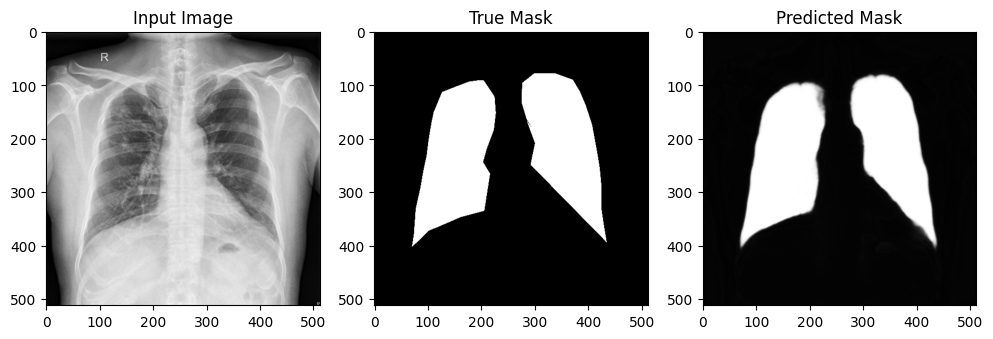

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image shape: (8, 512, 512, 3)
Mask shape: (8, 512, 512, 1)
Prediction shape: (8, 512, 512, 1)
Image data type: <dtype: 'float32'>
Mask data type: <dtype: 'float32'>
Prediction data type: float32
Image value range: [0.0, 1.0]
Mask value range: [0.0, 1.0]
Prediction value range: [0.00035918422508984804, 0.9999997615814209]


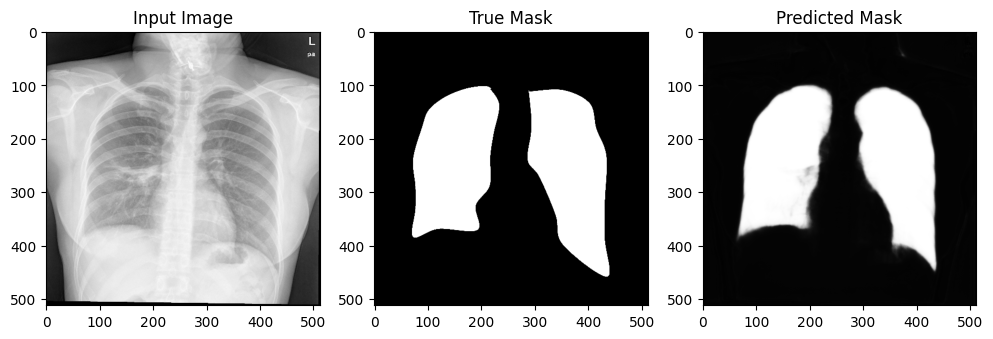

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Image shape: (8, 512, 512, 3)
Mask shape: (8, 512, 512, 1)
Prediction shape: (8, 512, 512, 1)
Image data type: <dtype: 'float32'>
Mask data type: <dtype: 'float32'>
Prediction data type: float32
Image value range: [0.0, 1.0]
Mask value range: [0.0, 1.0]
Prediction value range: [0.00043904889025725424, 0.9999997615814209]


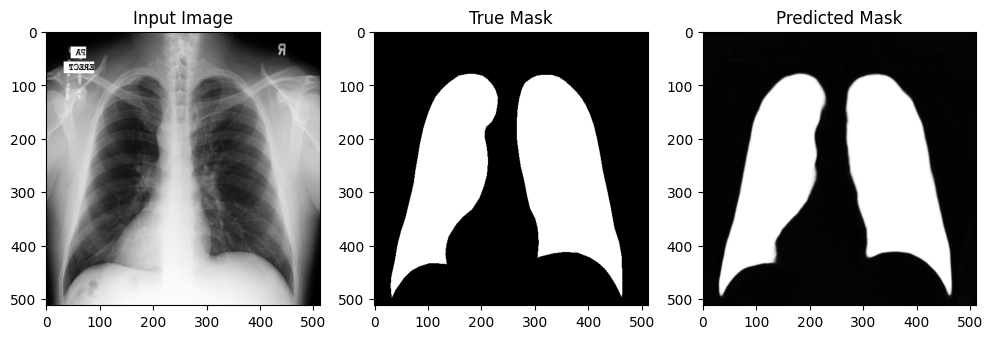

In [41]:
import matplotlib.pyplot as plt
import tensorflow as tf

def visualize_prediction(image, mask, prediction):
    plt.figure(figsize=(12, 4))

    # Convert tensors to numpy arrays and remove extra dimensions
    image = tf.squeeze(image).numpy()
    mask = tf.squeeze(mask).numpy()
    prediction = tf.squeeze(prediction).numpy()

    plt.subplot(131)
    plt.imshow(image)
    plt.title('Input Image')

    plt.subplot(132)
    plt.imshow(mask, cmap='gray')
    plt.title('True Mask')

    plt.subplot(133)
    plt.imshow(prediction, cmap='gray')
    plt.title('Predicted Mask')

    plt.show()

for image, mask in valid_dataset.take(1):
    prediction = model.predict(image)
    visualize_prediction(image[0], mask[0], prediction[0])

# After training
for image, mask in valid_dataset.take(2):
    prediction = model.predict(image)

    print(f"Image shape: {image.shape}")
    print(f"Mask shape: {mask.shape}")
    print(f"Prediction shape: {prediction.shape}")

    print(f"Image data type: {image.dtype}")
    print(f"Mask data type: {mask.dtype}")
    print(f"Prediction data type: {prediction.dtype}")

    print(f"Image value range: [{tf.reduce_min(image).numpy()}, {tf.reduce_max(image).numpy()}]")
    print(f"Mask value range: [{tf.reduce_min(mask).numpy()}, {tf.reduce_max(mask).numpy()}]")
    print(f"Prediction value range: [{tf.reduce_min(prediction).numpy()}, {tf.reduce_max(prediction).numpy()}]")

    visualize_prediction(image[0], mask[0], prediction[0])

In [ ]:
#save model:
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/BUNet.h5')

Mounted at /content/drive


If overfitting, Actions to take:

1.   Add a dropout layer to the Unet architecture
2.   add an L1 or L2 layer regularization to do the same
3.   Add Data augmentation [A method to increasy variety to prevent thje overtraining]

In [ ]:
# After training, you can use the test_x to predict segmentations
# test_predictions = model.predict(test_x)  # Inference after training


In [ ]:

# #new Unet Model, with regularization, and dropout:
# from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Modified U-Net model with dropout and L2 regularization
# def conv_block(input, num_filters):
#     x = Conv2D(num_filters, 3, padding="same", kernel_regularizer=l2(0.01))(input)
#     x = BatchNormalization()(x)
#     x = Activation("relu")(x)
#     x = Dropout(0.3)(x)

#     x = Conv2D(num_filters, 3, padding="same", kernel_regularizer=l2(0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation("relu")(x)
#     return x

# def encoder_block(input, num_filters):
#     x = conv_block(input, num_filters)
#     p = MaxPool2D((2, 2))(x)
#     return x, p

# def decoder_block(input, skip_features, num_filters):  #Takes the previous feature map and builds the segmentation mask
#     x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
#     x = Concatenate()([x, skip_features])
#     x = conv_block(x, num_filters)
#     return x

# def build_unet(input_shape):
#     inputs = Input(input_shape)

#     s1, p1 = encoder_block(inputs, 64)
#     s2, p2 = encoder_block(p1, 128)
#     s3, p3 = encoder_block(p2, 256)
#     s4, p4 = encoder_block(p3, 512)

#     b1 = conv_block(p4, 1024) #bridge between the encoderblock and the decoder block

#     d1 = decoder_block(b1, s4, 512)
#     d2 = decoder_block(d1, s3, 256)
#     d3 = decoder_block(d2, s2, 128)
#     d4 = decoder_block(d3, s1, 64)

#     outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

#     model = Model(inputs, outputs, name="U-Net")
#     return model


In [ ]:
# #NEW MODEL:

# #augment the model to artificially add images to the dataset, by making minor changes to the dataset
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# (train_x, train_y), (valid_x, valid_y) = load_data()
# test_x = load_test_data()

# print(f"Train: {len(train_x)} - {len(train_y)}")
# print(f"Valid: {len(valid_x)} - {len(valid_y)}")
# print(f"Test: {len(test_x)}")

# # Create TensorFlow datasets
# # train_dataset = tf_dataset(train_x, train_y, batch=8)
# # valid_dataset = tf_dataset(valid_x, valid_y, batch=8)
# train_dataset = tf_dataset(train_x, train_y, batch=4)  #Reducing Size to avoid OOM error
# valid_dataset = tf_dataset(valid_x, valid_y, batch=4)


# # Clear previous session to free up memory
# tf.keras.backend.clear_session()

# # Build U-Net model
# input_shape = (512, 512, 3)
# model = build_unet(input_shape)

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=1e-4),
#               loss='binary_crossentropy',
#               metrics=['accuracy', 'Precision', 'Recall'])


In [ ]:
# # Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# # Fit the model
# history = model.fit(
#     train_dataset,
#     validation_data=valid_dataset,
#     epochs=10,
#     callbacks=[early_stopping, reduce_lr]
# )

**MODEL METRICS**

In [ ]:
from tensorflow.keras.models import load_model
#mount google drive
from google.colab import drive
drive.mount('/content/drive')
# model_path = '/content/BUNet.h5'
# model = load_model(model_path, compile=False)
# print("Model loaded successfully.")

Mounted at /content/drive
Model loaded successfully.


In [40]:
from tensorflow.keras.models import load_model
model_path = '/content/drive/MyDrive/FinalUnet.h5'
model = load_model(model_path, compile=False)
print("Model loaded successfully.")

Model loaded successfully.


In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import tensorflow as tf

def compute_metrics(model, dataset):
    y_true_list = []
    y_pred_list = []

    for images, true_masks in dataset:
        # Get model predictions
        y_pred = model.predict(images)

        # Threshold predictions to binary values
        y_pred_binary = (y_pred > 0.5).astype(int)

        # Reshape the tensors to flatten them
        y_true_flat = tf.reshape(true_masks, [-1]).numpy().astype(int)
        y_pred_flat = tf.reshape(y_pred_binary, [-1])

        # Append to lists
        y_true_list.append(y_true_flat)
        y_pred_list.append(y_pred_flat)

    # Convert lists to numpy arrays
    y_true_array = np.concatenate(y_true_list)
    y_pred_array = np.concatenate(y_pred_list)

    # Calculate metrics
    f1 = f1_score(y_true_array, y_pred_array, average='binary')
    precision = precision_score(y_true_array, y_pred_array, average='binary')
    recall = recall_score(y_true_array, y_pred_array, average='binary')
    accuracy = accuracy_score(y_true_array, y_pred_array)

    # Calculate IoU and Dice Coefficient
    iou_score = iou(y_true_array, y_pred_array)
    dice_coefficient = dice_coef(y_true_array, y_pred_array)

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"IoU: {iou_score:.4f}")
    print(f"Dice Coefficient: {dice_coefficient:.4f}")

def iou(y_true, y_pred):
    """ Calculate Intersection over Union (IoU) """
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return (intersection + 1e-15) / (union + 1e-15)

def dice_coef(y_true, y_pred):
    """ Calculate Dice Coefficient """
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection + 1e-15) / (np.sum(y_true) + np.sum(y_pred) + 1e-15)


In [53]:
compute_metrics(model, valid_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Accuracy: 0.9805
Precision: 0.9709
Recall: 0.9519
F1-Score: 0.9613
IoU: 0.9255
Dice Coefficient: 0.9613


In [64]:
import numpy as np
import tensorflow as tf

def compute_iou_and_dice(model, dataset):
    y_true_list = []
    y_pred_list = []

    for images, true_masks in dataset:
        y_pred = model.predict(images)
        y_pred_binary = (y_pred > 0.5).astype(int)

        y_true_flat = tf.reshape(true_masks, [-1]).numpy().astype(int)
        y_pred_flat = tf.reshape(y_pred_binary, [-1])

        y_true_list.append(y_true_flat)
        y_pred_list.append(y_pred_flat)

    y_true_array = np.concatenate(y_true_list)
    y_pred_array = np.concatenate(y_pred_list)

    iou_score = iou(y_true_array, y_pred_array)
    dice_coefficient = dice_coef(y_true_array, y_pred_array)

    print(f"IoU: {iou_score:.4f}")
    print(f"Dice Coefficient: {dice_coefficient:.4f}")


def iou(y_true, y_pred):
    """ Calculate Intersection over Union (IoU) """
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return (intersection + 1e-15) / (union + 1e-15)

def dice_coef(y_true, y_pred):
    """ Calculate Dice Coefficient """
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection + 1e-15) / (np.sum(y_true) + np.sum(y_pred) + 1e-15)

In [65]:
def load_test_data():
    test_images = sorted(glob(os.path.join(TEST_IMAGE_PATH, "*.png")))
    test_masks = sorted(glob(os.path.join(TEST_MASK_PATH, "*.png")))

    assert len(test_images) == len(test_masks), "Number of test images and masks do not match"

    return test_images, test_masks

In [66]:
def tf_test_dataset(X, Y, batch=8):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    dataset = dataset.map(tf_parse)  # Use the same parsing function as before
    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(4)
    return dataset

In [67]:
# Load the test data
test_x, test_y = load_test_data()

# Create the test dataset
test_dataset = tf_test_dataset(test_x, test_y, batch=8)

In [69]:
def compute_iou_and_dice(model, dataset):
    y_true_list = []
    y_pred_list = []

    total_images = len(dataset)  # Get the total number of images in the dataset
    print(f"Total images to process: {total_images}")

    for index, (images, true_masks) in enumerate(dataset):
        # Get model predictions
        y_pred = model.predict(images)

        # Threshold predictions to binary values
        y_pred_binary = (y_pred > 0.5).astype(int)

        # Reshape the tensors to flatten them
        y_true_flat = tf.reshape(true_masks, [-1]).numpy().astype(int)
        y_pred_flat = tf.reshape(y_pred_binary, [-1])

        # Append to lists
        y_true_list.append(y_true_flat)
        y_pred_list.append(y_pred_flat)

        # Print progress
        print(f"Processing image {index + 1}/{total_images}")

    # Convert lists to numpy arrays
    y_true_array = np.concatenate(y_true_list)
    y_pred_array = np.concatenate(y_pred_list)

    # Calculate metrics
    iou_score = iou(y_true_array, y_pred_array)
    dice_coefficient = dice_coef(y_true_array, y_pred_array)

    # Print metrics
    print(f"IoU: {iou_score:.4f}")
    print(f"Dice Coefficient: {dice_coefficient:.4f}")

# Call the modified function
compute_iou_and_dice(model, test_dataset)

Total images to process: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Processing image 1/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing image 2/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Processing image 3/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 4/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Processing image 5/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Processing image 6/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Processing image 7/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 8/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Processing image 9/9
IoU: 0.9233
Dice Coefficient: 0.9601


In [70]:
compute_iou_and_dice(model, test_dataset)

Total images to process: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Processing image 1/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Processing image 2/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Processing image 3/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 4/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Processing image 5/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Processing image 6/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Processing image 7/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Processing image 8/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Processing image 9/9
IoU: 0.9233
Dice Coefficient: 0.9601
